In [5]:
from pysparkling import *
H2OContext.getOrCreate(sc)
import h2o


Checking whether there is an H2O instance running at http://10.0.0.4:54321. connected.


H2O cluster uptime:,32 secs
H2O cluster version:,3.10.3.2
H2O cluster version age:,5 days
H2O cluster name:,sparkling-water-tome_1942130987
H2O cluster total nodes:,1
H2O cluster free memory:,868 Mb
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://10.0.0.4:54321
H2O connection proxy:,None


In [75]:
data = h2o.import_file(
"https://raw.githubusercontent.com/DarrenCook/h2o/bk/datasets/ENB2012_data.csv")
#factorsList = ["X6","X8"]
#data[factorsList] = data[factorsList].asfactor()

train, test = data.split_frame([0.8])
x = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]
y = "Y2" # Or "Y1"

Parse progress: |█████████████████████████████████████████████████████████| 100%


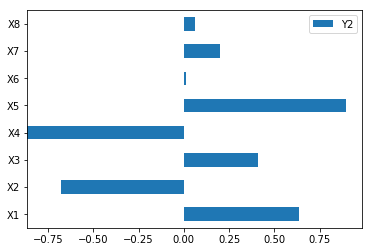

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

res = train[x].cor(train[y]).as_data_frame()
res.index = x
res.plot.barh()
plt.show()

# Shows correlations
# X2 and X1 strong negative correlations
# X4 and X5 also strong neg correlations
# X4 and X2 strong pos correlations


In [78]:
train["Y2"].cor(train["Y1"])
# Strong correlation of Y2 and Y1 - we are using Y2 through examples b/c it's
# supposed to be harder to predict


0.9755938761988913

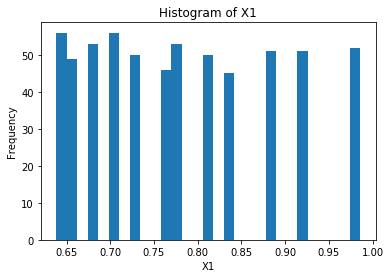

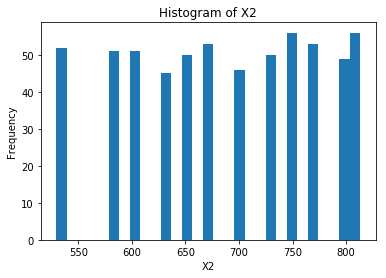

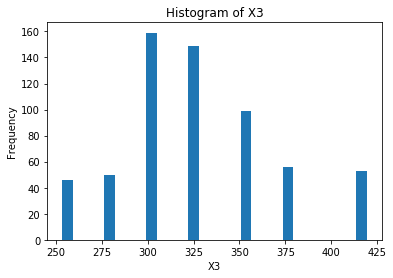

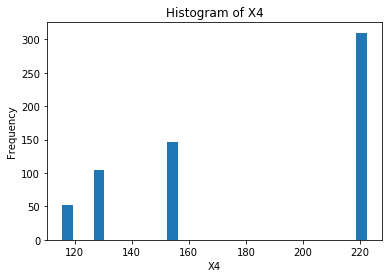

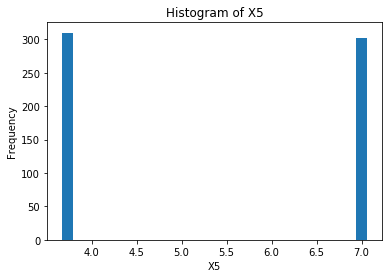

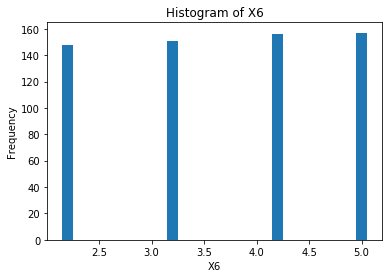

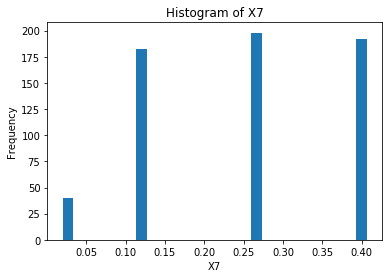

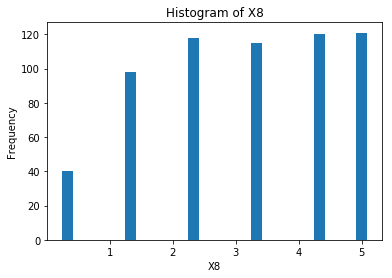

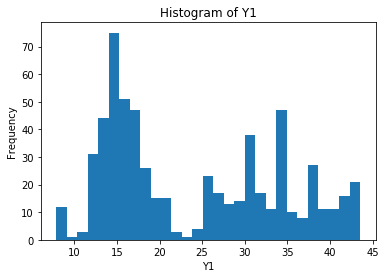

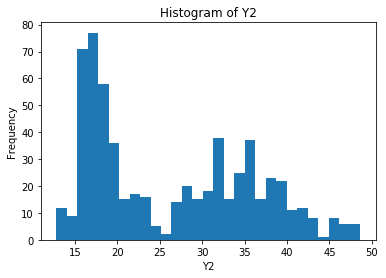

In [93]:
for col in train.col_names:
    t= train[col].hist(breaks = 30)

## Default Random Forest

In [97]:
factorsList = ["X6","X8"]
data[factorsList] = data[factorsList].asfactor()

m = h2o.estimators.H2ORandomForestEstimator(model_id="RF_defaults", nfolds=10)
m.train(x, y, train)
m

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  RF_defaults


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3.2046833238
RMSE: 1.79016293219
MAE: 1.19341068742
RMSLE: 0.0546639286854
Mean Residual Deviance: 3.2046833238

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 3.02478879702
RMSE: 1.73919199544
MAE: 1.1696766441
RMSLE: 0.0530697467059
Mean Residual Deviance: 3.02478879702
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
mae,1.1689769,0.1333494,1.2126471,1.5194851,1.1900548,1.360929,0.8572084,1.1139668,1.3262506,1.0365546,0.9471604,1.1255122
mse,3.0175781,0.6353369,3.527199,4.8041434,2.7864358,3.69422,1.7331219,2.949938,3.7719514,2.4648893,1.8249302,2.6189523
r2,0.9668092,0.0055546,0.9613699,0.9521972,0.9659195,0.9602233,0.9790003,0.9686250,0.9603581,0.9734920,0.9721643,0.9747423
residual_deviance,3.0175781,0.6353369,3.527199,4.8041434,2.7864358,3.69422,1.7331219,2.949938,3.7719514,2.4648893,1.8249302,2.6189523
rmse,1.7176602,0.1833327,1.878084,2.1918356,1.669262,1.9220355,1.3164809,1.7175384,1.9421513,1.5699966,1.3508998,1.6183177
rmsle,0.0527714,0.0040062,0.0529982,0.0626018,0.0528679,0.0601758,0.0474910,0.0524842,0.0578696,0.0471006,0.0440480,0.0500765


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-02-05 20:08:31,9.081 sec,0.0,nan,nan,nan
,2017-02-05 20:08:31,9.102 sec,1.0,2.1914892,1.4204916,4.8026250
,2017-02-05 20:08:31,9.111 sec,2.0,2.2309497,1.3958318,4.9771365
,2017-02-05 20:08:31,9.130 sec,3.0,2.1099757,1.3156516,4.4519975
,2017-02-05 20:08:31,9.138 sec,4.0,1.9611399,1.2309152,3.8460699
---,---,---,---,---,---,---
,2017-02-05 20:08:31,9.417 sec,46.0,1.7915407,1.1942274,3.2096179
,2017-02-05 20:08:31,9.423 sec,47.0,1.7926357,1.1938569,3.2135426
,2017-02-05 20:08:31,9.429 sec,48.0,1.7967745,1.1998394,3.2283985
,2017-02-05 20:08:31,9.438 sec,49.0,1.7933622,1.1989965,3.2161481



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
X5,759740.0,1.0,0.3171623
X1,737309.9375000,0.9704767,0.3077987
X2,399104.25,0.5253169,0.1666107
X4,321040.5937500,0.4225664,0.1340221
X3,89146.8281250,0.1173386,0.0372154
X7,58427.5390625,0.0769047,0.0243913
X8,22267.7949219,0.0293098,0.0092960
X6,8392.4550781,0.0110465,0.0035035


In [98]:
m.model_performance(test)



ModelMetricsRegression: drf
** Reported on test data. **

MSE: 3.04546261235
RMSE: 1.74512538585
MAE: 1.23325774009
RMSLE: 0.0536497649511
Mean Residual Deviance: 3.04546261235


## Cartesian Grid
Caresian Grids give a way to test a selection of different parameters
It basically brute force tries each combination

In [101]:
g = h2o.grid.H2OGridSearch(
    h2o.estimators.H2ORandomForestEstimator(
        nfolds=10
    ),
    hyper_params={
        "ntrees": [50, 100, 120],
        "max_depth": [40, 60],
        "min_rows": [1,2]
    }
)
g.train(x, y, train)
# This shows that min_rows 1 is always better than 2
# max depth is identical regardless

drf Grid Build progress: |████████████████████████████████████████████████| 100%


The following shows that:
* min_rows 1 is always better than 2
* max depth is identical regardless of 40 or 60
* more treas is generally better, but not always


In [103]:
g

     max_depth min_rows ntrees  \
0           40      1.0    100   
1           60      1.0     50   
2           40      1.0    120   
3           40      1.0     50   
4           60      1.0    120   
5           60      1.0    100   
6           60      2.0    100   
7           60      2.0    120   
8           60      2.0     50   
9           40      2.0     50   
10          40      2.0    120   
11          40      2.0    100   

                                                        model_ids  \
0    Grid_DRF_py_83_sid_8deb_model_python_1486316361085_1_model_4   
1    Grid_DRF_py_83_sid_8deb_model_python_1486316361085_1_model_1   
2    Grid_DRF_py_83_sid_8deb_model_python_1486316361085_1_model_8   
3    Grid_DRF_py_83_sid_8deb_model_python_1486316361085_1_model_0   
4    Grid_DRF_py_83_sid_8deb_model_python_1486316361085_1_model_9   
5    Grid_DRF_py_83_sid_8deb_model_python_1486316361085_1_model_5   
6    Grid_DRF_py_83_sid_8deb_model_python_1486316361085_1_model_7   
7   G

## Random Discrete
Use when you have so many hyper parameters that trying all combinations would be too much.  Good params for randomdiscrete:
* max_models - try x models and then stop
* max_runtime_secs
* stopping_metric - AUTO, misclassification, etc.
* stopping_tolerance - e.g., .0001 to requre at least .01% improvement to the given metric
* stopping_rounds - e.g., if set to 5, if none of the last 5 rounds managed to be better than stopping tolerance, then stop

In [108]:
g = h2o.grid.H2OGridSearch(
    h2o.estimators.H2ORandomForestEstimator(
        nfolds=5,
        max_depth=40,
        stopping_metric="deviance",
        stopping_tolerance=0,
        stopping_rounds=4,
        score_tree_interval=3
    ),
    hyper_params={
        "ntrees": [50, 100, 150, 200, 250],
        "mtries": [2, 3, 4, 5],
        "sample_rate": [0.5, 0.632, 0.8, 0.95],
        "col_sample_rate_per_tree": [0.5, 0.9, 1.0]
    },
    search_criteria = {
        'strategy': "RandomDiscrete",
        "stopping_metric": "mse",
        "stopping_tolerance": .001,
        "stopping_rounds": 10,
        "max_runtime_secs": 120
    }
)
g.train(x, y, train)



drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [109]:
g

     col_sample_rate_per_tree mtries ntrees sample_rate  \
0                         1.0      3     56       0.632   
1                         1.0      3     45         0.5   
2                         0.9      2     26        0.95   
3                         1.0      5     49         0.5   
4                         0.9      5     52         0.8   
5                         0.9      3     32       0.632   
6                         1.0      2     42       0.632   
7                         1.0      5     39       0.632   
8                         0.9      5     57       0.632   
9                         0.9      2     53         0.8   
10                        0.9      2     43         0.5   
11                        0.5      5     51         0.5   
12                        1.0      5     40        0.95   
13                        0.5      3     45       0.632   
14                        0.5      4     46         0.8   
15                        0.5      5     49       0.632 

## Deep Learning Default

In [105]:
m = h2o.estimators.H2ODeepLearningEstimator(model_id="DL_defaults", nfolds=10)
m.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
